In [1]:
!pip install duckdb==0.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 29.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

#from google.colab import drive
#drive.flush_and_unmount()

Mounted at /content/drive


In [3]:
import duckdb
import pandas as pd
import os
from IPython.display import display
import numpy as np

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Declaration of auxiliar functions

In [5]:
def generate_table(conn, df, name):
        drop_table(conn, name)
        existingTables=conn.execute("SHOW TABLES").fetchall()
        if(len(existingTables)>0):
            for table in existingTables:
                if(table[0] == name):
                    conn.execute("DROP TABLE " + name)
        conn.execute("CREATE TABLE " + name + " AS SELECT * FROM df")
        
def drop_table(conn, name):
        existingTables=conn.execute("SHOW TABLES").fetchall()
        if(len(existingTables)>0):
            for table in existingTables:
                if(table[0] == name):
                    conn.execute("DROP TABLE " + name)

### Getting dataset

In [6]:
conn = duckdb.connect("/content/drive/MyDrive/ADSDB BASES DE DATOS/copy_DB_FeatureGeneration",read_only=False)
existingTables=conn.execute("SHOW TABLES").fetchall()
existingTables

[('startups_studentsPerformance',)]

In [7]:
df=conn.execute("SELECT * from startups_studentsPerformance".format()).fetchdf()

In [8]:
#show the table 
df.head()

,category_list,market,funding_total_usd,state_code,region,city,funding_rounds,founded_month,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_high,math_test_pct_prof_midpt,math_test_pct_prof_low,men_read_test_valid,men_math_test_valid,women_read_test_valid,women_math_test_valid,white_read_test_valid,white_math_test_valid,black_read_test_valid,black_math_test_valid,hispanic_read_test_valid,hispanic_math_test_valid,asian_read_test_valid,asian_math_test_valid,native_indian_read_test_valid,native_indian_math_test_valid,more2Races_read_test_valid,more2Races_math_test_valid,lep_read_test_valid,lep_math_test_valid,migrant_read_test_valid,migrant_math_test_valid,disability_read_test_valid,disability_math_test_valid,homeless_read_test_valid,homeless_math_test_valid,econ_disadvantaged_read_test_valid,econ_disadvantaged_math_test_valid,foster_care_read_test_valid,foster_care_math_test_valid,military_connected_read_test_valid,military_connected_math_test_valid,population,nTeachers,enrollment,nPublicSchools,nSchools,status,transformed_funding_total_usd,transformed_venture,transformed_debt_financing,nFoundedDays,nPrivateSchools,teachersPerStudent,%noWhiteReadValid,%noWhiteMathValid,%EcoDisadReadValid,%EcoDisadMathValid,%asianReadValid,%asianMathValid
0,|Enterprise Software|,Enterprise Software,349000.0,Unknown,Sheffield,SHEFFIELD,3.830485e-13,2003-01,7.672461e-10,2006-04-11,2006-04-11,0.0,1.336839e-07,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.028102e-09,1.681583e-10,1.727549e-10,1.704566e-10,1.025038e-09,1.524533e-10,1.501550e-10,1.478567e-10,5.182646e-10,5.174985e-10,5.653795e-10,5.653795e-10,4.052653e-10,4.044992e-10,3.087371e-10,3.079710e-10,2.731136e-10,2.685170e-10,1.800328e-11,1.800328e-11,8.427066e-12,8.810115e-12,3.102693e-11,3.102693e-11,1.026570e-10,1.041892e-10,6.128775e-12,6.511824e-12,1.252568e-10,1.214264e-10,4.060314e-11,3.524046e-11,8.771810e-10,8.825437e-10,4.596582e-12,4.596582e-12,7.660969e-12,8.810115e-12,8.875233e-10,7.086397e-11,8.166593e-10,3.447436e-12,3.447436e-12,operating,36.865311,-2.791340e+153,-6.575231e+153,5479 days,0.000000e+00,0.086773,0.605812,0.605381,0.853204,0.860987,0.017511,0.017564
1,|Real Estate|,Real Estate,0.0,UT,Salt Lake City,SOUTH JORDAN,1.935644e-13,2014-08,3.898387e-10,2014-08-24,2014-08-24,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.562082e-10,1.469154e-10,1.558193e-10,1.513674e-10,9.577567e-10,1.269783e-10,1.222359e-10,1.174936e-10,4.819754e-10,4.821689e-10,3.640947e-10,3.642882e-10,9.360775e-10,9.027844e-10,3.193813e-10,3.191877e-10,1.885317e-10,1.925966e-10,1.022020e-10,1.035570e-10,1.722723e-11,1.722723e-11,3.232526e-11,3.232526e-11,1.742080e-11,1.761436e-11,3.097031e-12,4.064853e-12,9.523369e-11,9.465300e-11,1.896931e-11,1.993713e-11,3.952585e-10,4.043561e-10,3.677724e-12,4.258417e-12,6.000497e-12,6.000497e-12,2.510918e-09,-3.287304e-09,2.510918e-09,3.290595e-12,3.290595e-12,operating,-3.362420,-2.794240e+153,-6.575231e+153,1229 days,0.000000e+00,-1.309204,0.021053,0.057397,0.413360,0.422191,0.106883,0.108124
2,|Software|,Software,200000000.0,NY,New York City,HAWTHORNE,8.238600e-14,1999-01,1.646896e-10,2013-09-12,2013-09-12,0.0,0.000000e+00,0.0,0.0,0.0,0.000016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.715283e-10,1.126217e-10,1.249796e-10,1.188006e-10,6.994571e-10,1.091614e-10,1.029825e-10,9.680355e-11,4.152254e-10,4.064925e-10,4.102823e-10,4.179442e-10,2.441097e-10,2.441097e-10,1.015819e-10,1.011700e-10,2.648710e-10,2.624818e-10,5.124409e-11,5.215034e-11,4.943160e-12,5.190318e-12,3.682654

In [9]:
conn.close()


# **PCA**

In [10]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
x = df.select_dtypes(include=numerics)

In [11]:
df['target']=np.zeros(df['status'].size, dtype=int)

In [12]:
df['target'].iloc[df['status']=='operating']=0
df['target'].iloc[df['status']=='acquired']=1
df['target'].iloc[df['status']=='closed']=2

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
from sklearn.preprocessing import StandardScaler

# Separating out the target
y = df['target']

# # Standardizing the features
x = StandardScaler().fit_transform(x)

In [14]:
y.shape

(12000,)

# **PCA PROJECTION TO 2D**

In [15]:
from sklearn.decomposition import PCA

pca = PCA(0.70)
x_new = pca.fit_transform(x)
columnsName=['pc'+str(i+1) for i in range(x_new.shape[1])]


In [16]:
principalDf = pd.DataFrame(data = x_new, columns = columnsName)


In [17]:
#Concatenating DataFrame along axis = 1. finalDf is the final DataFrame before plotting the data.
finalDf = pd.concat([principalDf, df[['status']]], axis = 1)

In [18]:
finalDf.head()


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,status
0,6.207642,-1.182656,-1.684154,2.917781,0.605897,0.576464,-2.084264,1.098093,-0.494125,0.338421,0.761389,0.517330,0.373054,-0.450828,0.889076,operating
1,4.114529,-1.934412,1.898414,2.135391,0.671212,-5.054710,-0.360694,-2.168966,5.301872,9.733312,3.092749,-7.106606,-0.374183,2.396182,4.663725,operating
2,1.553006,1.081601,0.855138,0.077185,1.324704,1.604759,-3.769818,0.192832,1.809611,-4.095680,0.746204,-2.736997,4.866110,-1.190176,0.565635,operating
3,-1.931852,0.491434,-0.525944,3.184916,-0.281244,-2.863165,-0.191862,0.274720,-0.053950,-0.150264,-0.522479,-0.338078,-0.972656,-0.027895,-0.005324,closed
4,-3.834697,2.254379,-1.761885,-1.982586,0.201882,2.144181,-0.505948,-0.090749,-1.463986,-0.217811,0.108699,0.410659,0.685610,0.779530,-0.533834,operating


# **VISUALIZE 2D PROJECTION**

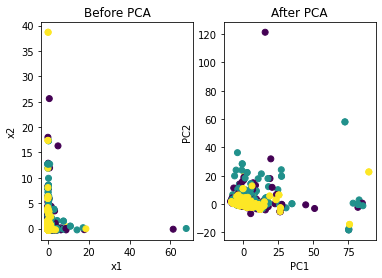

In [19]:
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2)
axes[0].scatter(x[:,0], x[:,1],c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(x_new[:,0], x_new[:,1],c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

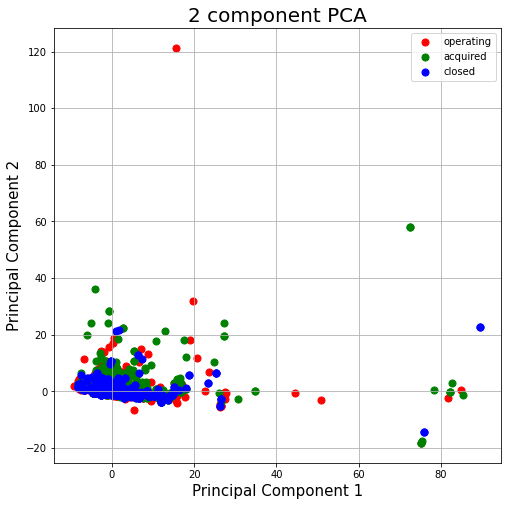

In [20]:
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['operating', 'acquired', 'closed']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['status'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [21]:
pca.explained_variance_ratio_

array([0.24317591, 0.05601373, 0.04917255, 0.04860778, 0.03898467,
       0.03833759, 0.03142512, 0.03086834, 0.02746243, 0.02731103,
       0.02599188, 0.02547302, 0.02346315, 0.02160024, 0.02023295])

# **The biplot**

In [22]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

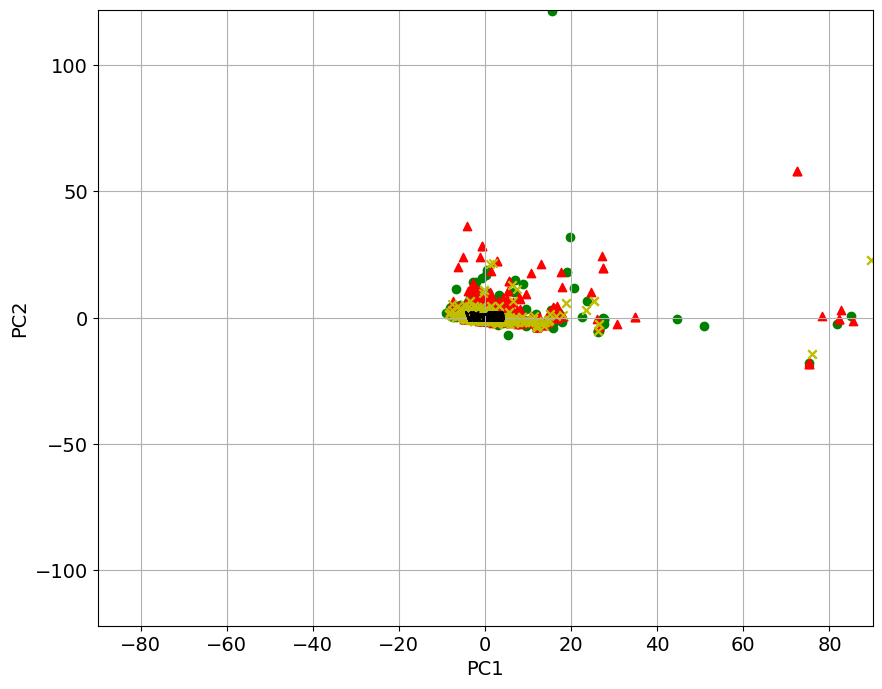

In [23]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(x_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

# **Feature importance**

In [24]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
np.random.seed(0)

# number of components
n_pcs= pca.components_.shape[0]


In [25]:
columns=df.select_dtypes(include=numerics).columns

In [26]:

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
importantFeatures = pd.DataFrame(dic.items())

In [27]:
importantFeatures.head()

,0,1
0,PC0,nSchools
1,PC1,venture
2,PC2,%asianMathValid
3,PC3,%EcoDisadMathValid
4,PC4,lep_math_test_valid


We look at the absolute values of the eigenvectors’ components corresponding to the k largest eigenvalues. In sklearn the components are sorted by explained variance. The larger they are these absolute values, the more a specific feature contributes to that principal component.

In [28]:
absEigenv=abs( pca.components_ )

In [29]:
pc1MostImportantFeaturesIndex=np.argpartition(absEigenv[0], -8)[-8:]
pc2MostImportantFeaturesIndex=np.argpartition(absEigenv[1], -8)[-8:]

In [30]:
columns[pc1MostImportantFeaturesIndex]

Index(['math_test_pct_prof_high', 'math_test_pct_prof_midpt',
       'read_test_pct_prof_midpt', 'read_test_pct_prof_high', 'nSchools',
       'read_test_pct_prof_low', 'nPublicSchools', 'math_test_pct_prof_low'],
      dtype='object')

In [31]:
columns[pc2MostImportantFeaturesIndex]

Index(['grant', 'funding_rounds', 'round_A', 'round_D', 'round_B', 'round_C',
       'venture', 'transformed_venture'],
      dtype='object')

In [32]:
finalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,status
0,6.207642,-1.182656,-1.684154,2.917781,0.605897,0.576464,-2.084264,1.098093,-0.494125,0.338421,0.761389,0.517330,0.373054,-0.450828,0.889076,operating
1,4.114529,-1.934412,1.898414,2.135391,0.671212,-5.054710,-0.360694,-2.168966,5.301872,9.733312,3.092749,-7.106606,-0.374183,2.396182,4.663725,operating
2,1.553006,1.081601,0.855138,0.077185,1.324704,1.604759,-3.769818,0.192832,1.809611,-4.095680,0.746204,-2.736997,4.866110,-1.190176,0.565635,operating
3,-1.931852,0.491434,-0.525944,3.184916,-0.281244,-2.863165,-0.191862,0.274720,-0.053950,-0.150264,-0.522479,-0.338078,-0.972656,-0.027895,-0.005324,closed
4,-3.834697,2.254379,-1.761885,-1.982586,0.201882,2.144181,-0.505948,-0.090749,-1.463986,-0.217811,0.108699,0.410659,0.685610,0.779530,-0.533834,operating


In [33]:
x=finalDf.iloc[:, 0:6]
y=finalDf.iloc[:,-1]

In [34]:
x.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,6.207642,-1.182656,-1.684154,2.917781,0.605897,0.576464
1,4.114529,-1.934412,1.898414,2.135391,0.671212,-5.054710
2,1.553006,1.081601,0.855138,0.077185,1.324704,1.604759
3,-1.931852,0.491434,-0.525944,3.184916,-0.281244,-2.863165
4,-3.834697,2.254379,-1.761885,-1.982586,0.201882,2.144181


In [35]:
y.head()

0    operating
1    operating
2    operating
3       closed
4    operating
Name: status, dtype: object

# **Conexion to Database**




In [36]:
conn = duckdb.connect("/content/drive/MyDrive/ADSDB BASES DE DATOS/copy_DB_FeatureGeneration",read_only=False)


In [37]:
df_percent = df.sample(frac=0.95)
df_rest = df.loc[~df.index.isin(df_percent.index)]
pcaForm = finalDf.loc[~finalDf.index.isin(df_percent.index)]
df_rest.to_csv("/content/drive/MyDrive/ADSDB BASES DE DATOS/testing_data.csv", encoding='utf-8', index=False)
pcaForm.to_csv("/content/drive/MyDrive/ADSDB BASES DE DATOS/testing_data_pca.csv", encoding='utf-8', index=False)

In [38]:
generate_table(conn,finalDf,"dataForModelling")
existingTables=conn.execute("SHOW TABLES").fetchall()
existingTables

[('dataForModelling',), ('startups_studentsPerformance',)]

In [39]:
#show the table 
df=conn.execute("SELECT * from dataForModelling").fetchdf()
df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,status
0,6.207642,-1.182656,-1.684154,2.917781,0.605897,0.576464,-2.084264,1.098093,-0.494125,0.338421,0.761389,0.517330,0.373054,-0.450828,0.889076,operating
1,4.114529,-1.934412,1.898414,2.135391,0.671212,-5.054710,-0.360694,-2.168966,5.301872,9.733312,3.092749,-7.106606,-0.374183,2.396182,4.663725,operating
2,1.553006,1.081601,0.855138,0.077185,1.324704,1.604759,-3.769818,0.192832,1.809611,-4.095680,0.746204,-2.736997,4.866110,-1.190176,0.565635,operating
3,-1.931852,0.491434,-0.525944,3.184916,-0.281244,-2.863165,-0.191862,0.274720,-0.053950,-0.150264,-0.522479,-0.338078,-0.972656,-0.027895,-0.005324,closed
4,-3.834697,2.254379,-1.761885,-1.982586,0.201882,2.144181,-0.505948,-0.090749,-1.463986,-0.217811,0.108699,0.410659,0.685610,0.779530,-0.533834,operating


In [40]:
conn.close()